In [1]:
%matplotlib inline

D:\Python27x64\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


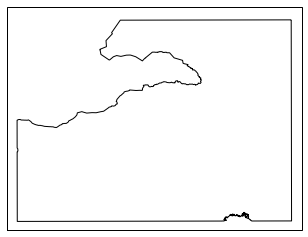

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

fname = 'D:\Data\ChinaShapefile//PilotAreas.shp'

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([111.5,124.3,40.3,50])
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')
ax.add_feature(shape_feature)
plt.show()

In [36]:
from osgeo import gdal
import numpy as np
tif_forecast = r'D:\tmp\ndai_out\NDAI\window14horizon7//NDAI_W14H07_2009_021.tif'
ds_frc = gdal.Open(tif_forecast)
print 'geotransform', ds_frc.GetGeoTransform()
print 'raster X size', ds_frc.RasterXSize
print 'raster Y size', ds_frc.RasterYSize

data_frc = ds_frc.ReadAsArray()
data_ma_frc = np.ma.masked_equal(data_frc,-9999)
data_ma_frc = np.ma.masked_invalid(data_ma_frc)
gt = ds_frc.GetGeoTransform()
proj = ds_frc.GetProjection()

xres = gt[1]
yres = gt[5]

# get the edge coordinates and add half the resolution 
# to go to center coordinates
xmin = gt[0] + xres * 0.5
xmax = gt[0] + (xres * ds_frc.RasterXSize) - xres * 0.5
ymin = gt[3] + (yres * ds_frc.RasterYSize) + yres * 0.5
ymax = gt[3] - yres * 0.5

#ds = None
gridlons = np.mgrid[xmin:xmax+xres:xres]
gridlats = np.mgrid[ymax+yres:ymin:yres]

# plt.imshow(data_ma, cmap='viridis')
# plt.show()

geotransform (111.92970000000011, 0.00999852305113156, 0.0, 49.42357600000006, 0.0, -0.00999928310502274)
raster X size 1193
raster Y size 876


geotransform (111.92970000000011, 0.00999852305113156, 0.0, 49.42357600000006, 0.0, -0.00999928310502274)
raster X size 1193
raster Y size 876


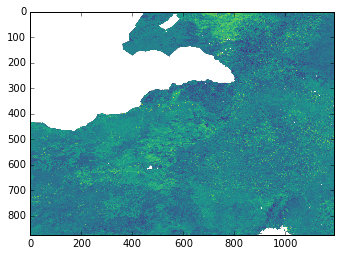

In [37]:
tif_observed = r'D:\Data\LS_DATA\NDAI-1day_IM_bbox_warp//NDAI_2009_021_IM_bbox_wrap.tif'
ds_obs = gdal.Open(tif_observed)
print 'geotransform', ds_obs.GetGeoTransform()
print 'raster X size', ds_obs.RasterXSize
print 'raster Y size', ds_obs.RasterYSize

data_obs = ds_obs.ReadAsArray()
data_ma_obs = np.ma.masked_equal(data_obs,-9999)
data_ma_obs = np.ma.masked_invalid(data_ma_obs)
plt.imshow(data_ma_obs, cmap='viridis')
plt.show()

In [4]:
import numpy as np
import matplotlib.colors as mcolors
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
c = mcolors.ColorConverter().to_rgb

def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    
    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in xrange(N+1) ]
    # Return colormap object.
    return mcolors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [5]:
cb_NDAI = make_colormap([c('#993406'), c('#D95E0E'),0.1, c('#D95E0E'), c('#FE9829'),0.2, 
                         c('#FE9829'), c('#FFD98E'),0.3, c('#FFD98E'), c('#FEFFD3'),0.4, 
                         c('#FEFFD3'), c('#C4DC73'),0.5, c('#C4DC73'), c('#93C83D'),0.6,
                         c('#93C83D'), c('#69BD45'),0.7, c('#69BD45'), c('#6ECCDD'),0.8,
                         c('#6ECCDD'), c('#3553A4'),0.9, c('#3553A4')])

In [6]:
# ticks of classes
#bounds = [0.,82.875,95.625,108.375,127.5,146.625,159.375,172.125,255.]
bounds = [-1,-0.35,-0.25,-0.15,0,0.15,0.25,0.35,1]
# ticklabels plus colorbar
ticks = ['-1','-0.35','-0.25','-0.15','+0','+.15','+.25','+.35','+1']
cmap = cmap_discretize(cb_NDAI,8)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

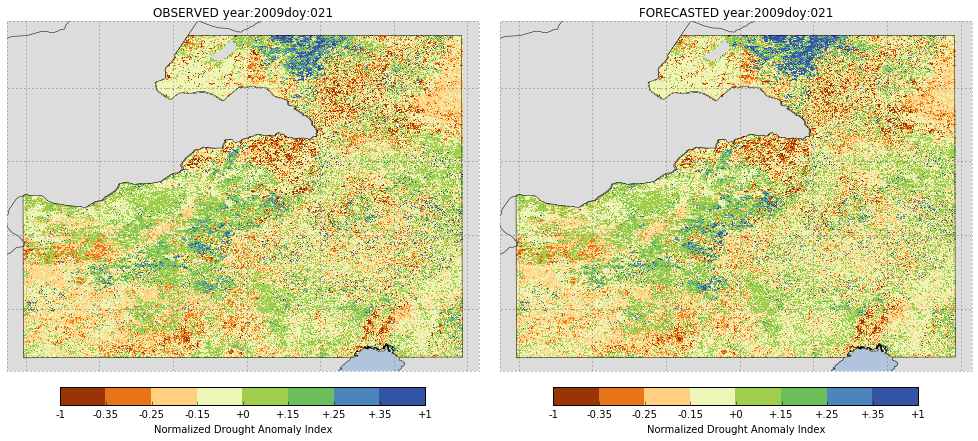

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature

## PLOT @@@@@@@@@@@@@@@ 1 @@@@@@@@@@@@@
#plt.figure(figsize=(41.53683777162, 18))
plt.figure(figsize=(13.84561259054,6))
ax = plt.subplot(121,projection=ccrs.PlateCarree())
#ax.background_patch.set_facecolor('none')
ax.set_extent([111.5,124.3,40.3,49.8])
ax.outline_patch.set_edgecolor('gray')
ax.outline_patch.set_linewidth(1)
ax.outline_patch.set_linestyle(':')

coastline = cfeature.COASTLINE.scale='10m'
borders = cfeature.BORDERS.scale='10m'
land = cfeature.LAND.scale='10m'
ocean = cfeature.OCEAN.scale='10m'

ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue') 
ax.add_feature(cfeature.LAND, facecolor='gainsboro')  
ax.add_feature(cfeature.COASTLINE,linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')  

#ax.add_feature(cfeature.RIVERS, linewidth=0.2, edgecolor='blue') 
gl = ax.gridlines(linewidth=1, color='gray', linestyle=':')
#gl.xlocator = mticker.FixedLocator(range(-180,190,20))
#gl.ylocator = mticker.FixedLocator(range(-60,90,10))
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

im = ax.pcolormesh(gridlons, gridlats, data_ma_obs, transform=ccrs.PlateCarree(), norm=norm, cmap=cmap, vmin=-1, vmax=1, zorder=2)
cb = plt.colorbar(im, fraction=0.0476, pad=0.04, ticks=bounds,norm=norm, orientation='horizontal')
cb.set_label('Normalized Drought Anomaly Index')
cb.set_ticklabels(ticks)

shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')
ax.add_feature(shape_feature, zorder=3, linewidth=0.5)
ax.set_title('OBSERVED '+'year: '+'2009'+' doy: '+'021')


## !@#$%^&*()-+!@#$%^&*()-+!@#$%^&*()-+!@#$%^&*()-+!@#$%^&*()-+
## PLOT @@@@@@@@@@@@@@@ 2 @@@@@@@@@@@@@
## !@#$%^&*()-+!@#$%^&*()-+!@#$%^&*()-+!@#$%^&*()-+!@#$%^&*()-+


ax = plt.subplot(122,projection=ccrs.PlateCarree())
#ax.background_patch.set_facecolor('none')
ax.set_extent([111.5,124.3,40.3,49.8])
ax.outline_patch.set_edgecolor('gray')
ax.outline_patch.set_linewidth(1)
ax.outline_patch.set_linestyle(':')

coastline = cfeature.COASTLINE.scale='10m'
borders = cfeature.BORDERS.scale='10m'
ocean = cfeature.OCEAN.scale='10m'
land = cfeature.LAND.scale='10m'

ax.add_feature(cfeature.LAND, facecolor='gainsboro')  
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')  
ax.add_feature(cfeature.COASTLINE,linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')  

#ax.add_feature(cfeature.RIVERS, linewidth=0.2, edgecolor='blue') 
gl = ax.gridlines(linewidth=1, color='gray', linestyle=':')
#gl.xlocator = mticker.FixedLocator(range(-180,190,20))
#gl.ylocator = mticker.FixedLocator(range(-60,90,10))
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
im = ax.pcolormesh(gridlons, gridlats, data_ma_frc, transform=ccrs.PlateCarree(), norm=norm, cmap=cmap, vmin=-1, vmax=1, zorder=2)
cb = plt.colorbar(im, fraction=0.0476, pad=0.04, ticks=bounds,norm=norm, orientation='horizontal')
cb.set_label('Normalized Drought Anomaly Index')
cb.set_ticklabels(ticks)

shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')
ax.add_feature(shape_feature, zorder=3, linewidth=0.5)
ax.set_title('FORECASTED '+'year: '+'2009'+' doy: '+'021')

plt.tight_layout()
plt.savefig(r'D:\tmp\ndai_out\PNG\window7horizon1//OBS_FRC_W07_H01_2009_021.png', dpi=100,bbox_inches='tight')
#plt.clf()
#plt.close()